$\textbf{Assignment Lab 6}$

Name: Vicente Valenzuela Carrasco

Code that I'll we be basing my results:

In [53]:
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')



class Integ61(Integrator):

    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)

    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)

    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f
    ###
def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-50, 50))
    ax.set_ylim((-50, 50))
    ax.set_zlim((0, 200))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75, label='initial')
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75, label='last')
    ax.legend()
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

------------------------------------------------------------------------------------------------------------------------------------------------------------

[Problem Experiment](#prob_experiment) 

Lorenz’ results are based on the following values of the physical parameters taken from Saltzman’s paper (Saltzman, 1962): $$\sigma=10 \quad \mathrm{and} \quad b=\frac{8}{3}.$$ 
As you will see in [Section stability](#sec_stability), there is a *critical value of the parameter $\rho$*, $\rho^\ast=470/19\approx 24.74$ (for these values of $\sigma$ and $\beta$); it is *critical* in the sense that for
any value of $\rho>\rho^\ast$, the flow is unstable.

To allow you to investigate the behaviour of the solution to the Lorenz
equations, you can try out various parameter values in the following
interactive example. *Initially, leave $\sigma$ and $\beta$ alone, and
modify only $\rho$ and the initial conditions.* If you have time,
you can try varying the other two parameters, and see what happens. Here
are some suggestions:

-   Fix the initial conditions at $(5,5,5)$ and vary $\rho$ between $0$ and
    $100$.
    
-   Fix $\rho=28$, and vary the initial conditions; for example, try
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$,
    $(8.5,8.5,27)$, etc.

-   Anything else you can think of …

------------------------------------------------------------------------------------------------------------------------------------------------------------

Fixing the initial condition $(x_{0},y_{0},z_{0})=(5,5,5)$ and vary $\rho$ between 0 and 100

In the following code creates a range of numbers for $\rho$ from 0 to 100, generating 9 plots with different trajectories.

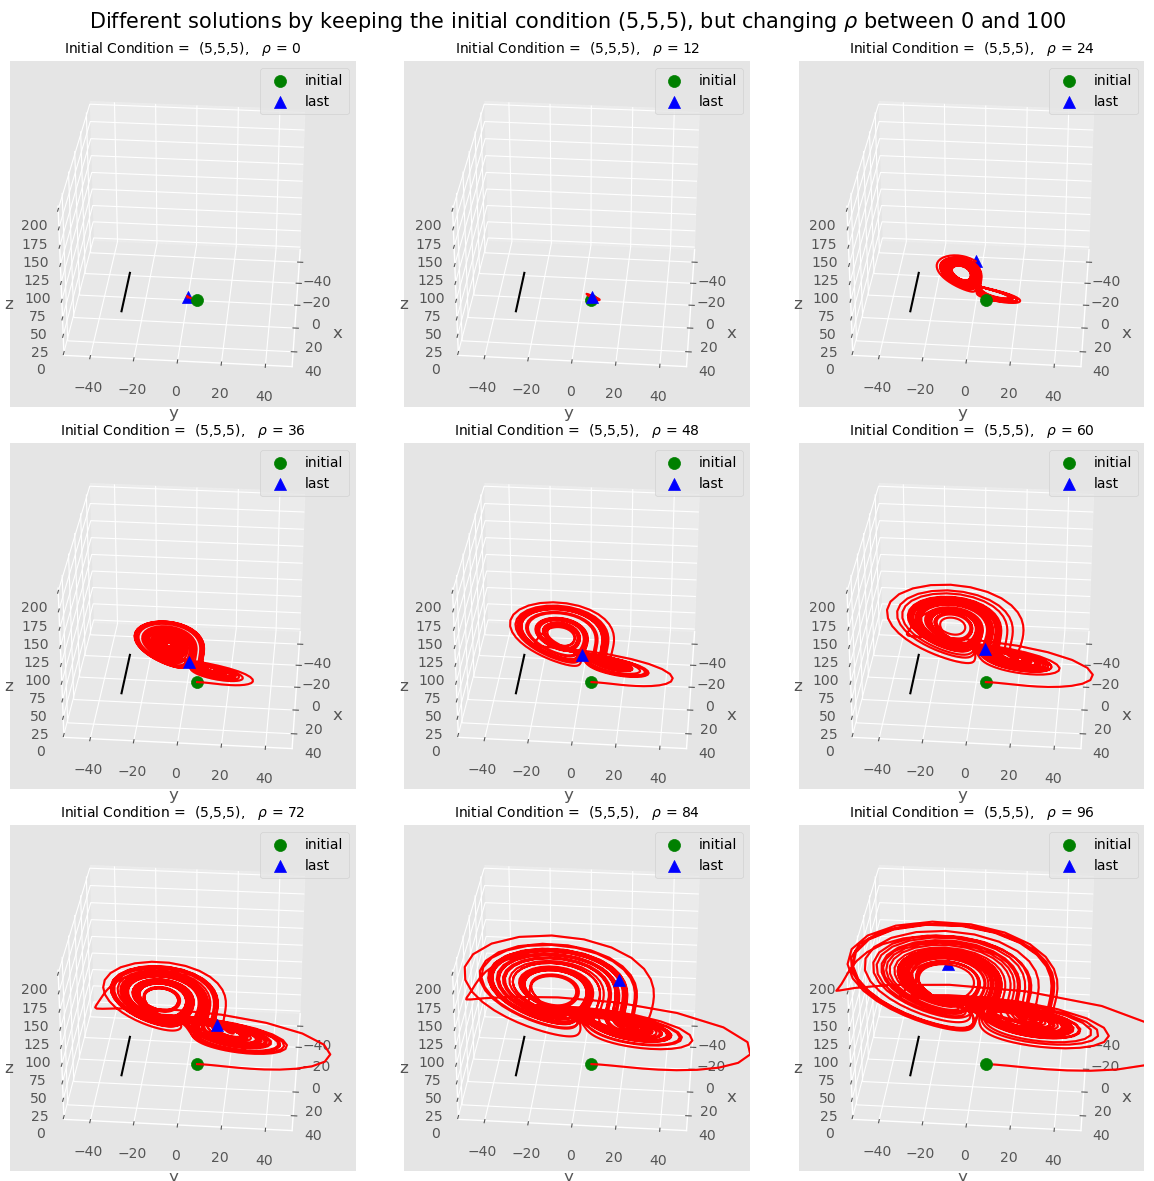

In [54]:

fig = plt.figure(figsize=(12, 12))

for i, rho_value in enumerate(np.arange(0, 100, 12)):
    timevars = dict(tstart=0, tend=27, dt=0.01)
    uservars = dict(sigma=10, beta=2.6666, rho=rho_value)
    initvars = dict(x=5, y=5, z=5)
    params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
    
    theSolver = Integ61('lorenz.yaml', **params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]

    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    ax = plot_3d(ax, xvals, yvals, zvals)
    ax.set_title(r'Initial Condition =  (5,5,5),   $\rho$ = {}'.format(params['uservars']['rho']), fontsize=10)
plt.suptitle(r'Different solutions by keeping the initial condition (5,5,5), but changing $\rho$ between 0 and 100', fontsize=15)
plt.tight_layout()
plt.show()

 Fixing $\rho=28$, and varying the initial conditions:
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(8.5,-8.5,27)$, $(-20,20,40)$,
    $(40,40,60)$, $(80,80,80)$

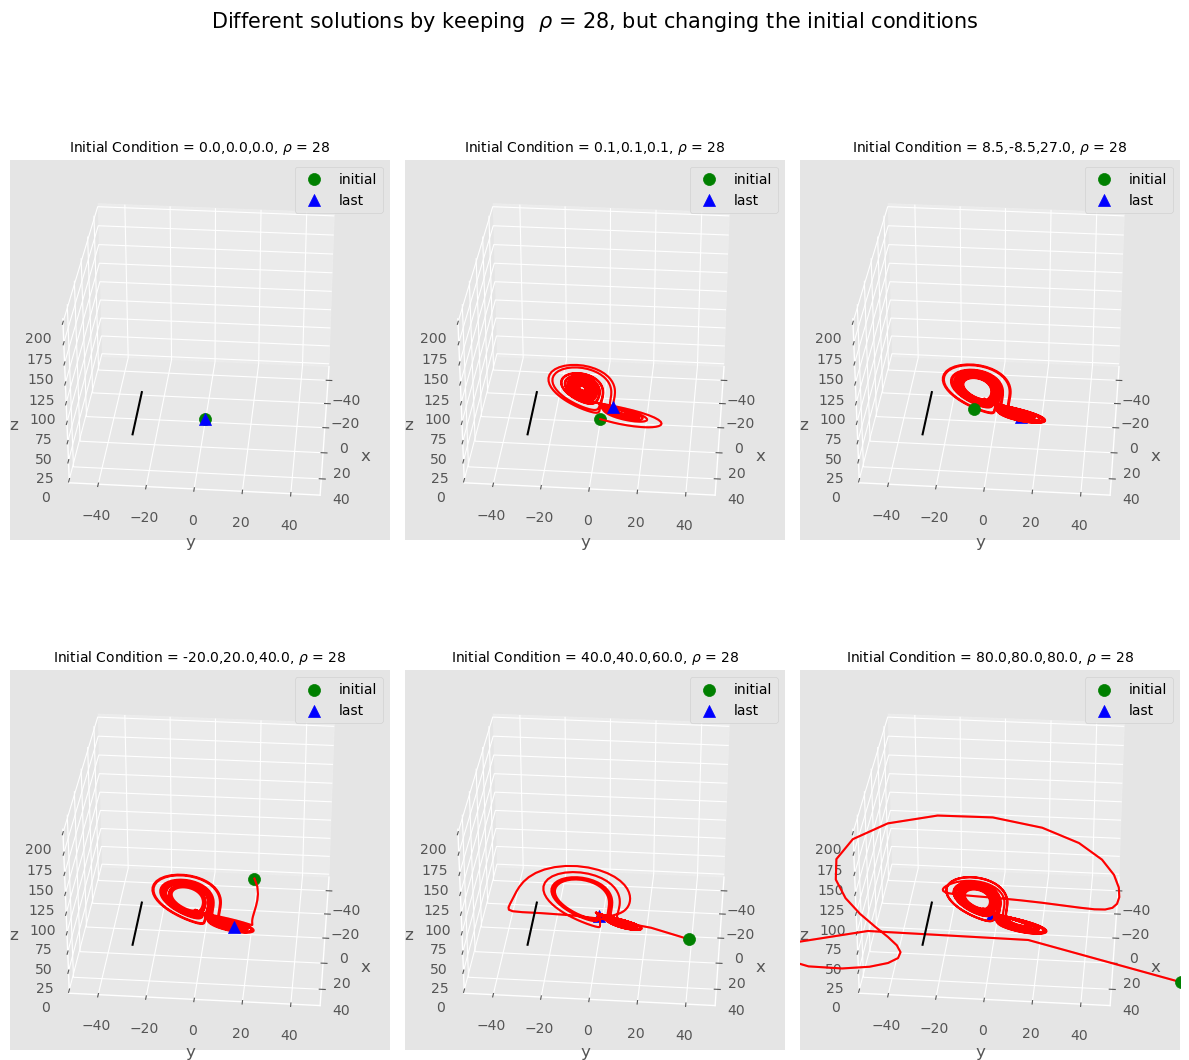

In [55]:
fig = plt.figure(figsize=(12, 12))
x_values = [0,0.1,8.5,-20,40,80]
y_values = [0,0.1,-8.5,20,40,80]
z_values = [0,0.1,27,40,60,80]
for i in range(len(x_values)):
    timevars = dict(tstart=0, tend=27, dt=0.01)
    uservars = dict(sigma=10, beta=2.6666, rho=28)
    initvars = dict(x=x_values[i], y=y_values[i], z=z_values[i])
    params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
    
    theSolver = Integ61('lorenz.yaml', **params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]

    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax = plot_3d(ax, xvals, yvals, zvals)
    ax.set_title(r'Initial Condition = {},{},{}'.format(*coords[0,:])  + r', $\rho$ = {}'.format(params['uservars']['rho']), fontsize=10)
plt.suptitle(r'Different solutions by keeping  $\rho$ = 28, but changing the initial conditions', fontsize=15)
plt.tight_layout()
plt.show()

1.  Describe the different types of behaviour you see and compare them
    to what you saw in [Figure fixed-plot](#fig_fixed-plot). Also, discuss the
    results in terms of what you read in [Section Introduction](#sec_introduction)
    regarding the four properties of the solution.


By keeping the initial condition fixed to (x,y,z) = (5,5,5) and changing the control parameter ($\rho$) between 0 and 100, we see that at first there are not big changes in the trajectories, maintaining similarities and a close distance between the initial and final point. But, we can see changes into a slightly more cahotic behaviour when we are approching to $\rho* \approx$ 24.74. After this critical value, the trajectories are more cahotic by becoming more unstable, describing the butterfly shaped plot with bigger jumps around all of the 3 components (x,y,z).

On the other hand, if we fixed $\rho$ = 28, which is an unstable control parameter ($\rho$ > $\rho*$), and we change the initial conditions several times, we can see that even if we change them, many of the trajectories look quite similar, converging from different initial points to similar ending points, following the butterfly shaped curve with differences in the trajectories.

Considering the 4 different properties mentioned in the Lab 6 introduction, we can see that every solution that we get in the plots is within a bounded region, describing different trajectories and magnitudes. This may differ at the beginning of some trajectories with initial conditions that were too big, but the general solution still remains enclosed to this bounded region. Also, regarding to the back and forth behaviour, we can clearly see that in how the trajectories are shaped in the form of the wings of a butterfly, where solutions are always moving around them, even if we changed the control parameter or the initial conditions.

Regarding to the resulting solutions, we can see that for every change in the initial conditions, the followed trajectories are always different. They may describe a similar butterfly pattern, but by following it with different and random ways for every change in their initial conditions. Therefore, it's impossible to predict an exact solution, we are going to get a different result every time because of the instability of the system. 


2.  One question you should be sure to ask yourself is: *Does
    changing the initial condition affect where the solution ends
    up?* The answer to this question will indicate whether there
    really is an attractor which solutions approach as
    $t\rightarrow\infty$.


In relation to the last question, and by looking at the solutions where the initial conditions were changed several times. We can see that at every solution the ending point (final position) is similar between them, which can lead us to think in the concept of an "attractor". Because, even if we change the initial conditions in random ways, we see that the final outcome is always different, but similar around a certain range of values.


3.  Finally, for the different types of solution behaviour, can you
    interpret the results physically in terms of the thermal convection
    problem?

In this case, we are maintaining the parameters $\sigma$ and $\beta$, but changing $\rho$, which is the control parameter that represents the temperature difference between the top and bottom of the tank (in the convection problem). Also, where are changing $\textbf{X}$ (intensity of the convective motion), $\textbf{Y}$ (temperature difference between ascending and descending currents) and $\textbf{Z}$ (distortion of the vertical temperature profile from linearity).

Considering these paremeters, while changing $\rho$ between a range of values we were increasing the temperature differences between the top and bottom regions, which then implied that the convenction intensity and the temperature difference between currents was bigger, resulting in more uniformly mixed temperatures in the middle of the tank, but stronger gradients near the boundaries.

On the other hand, we also fixed the temperature difference between the top and bottom of the tank ($\rho$), while we were changing the initial convection motion, temperature difference between currents and the vertical distortion (X, Y and Z). By looking at the results, we see that for every initial condition used, the temperature changes were different at the beginning, but even if they were following a random behaviour, the final state of the tank is similar, with more mixed temperatures in the middle of the tank and oscilating currents with different intensities following the pattern of the butterfly shaped curve.

------------------------------------------------------------------------------------------------------------------------------------------------------------

**[Problem Sensitivity](#prob_sensitivity)** 
    
One property of chaotic systems such as the Lorenz equations is their *sensitivity to initial
conditions* – a consequence of the “butterfly effect.” Modify your code from [Problem adaptive](#prob_adaptive) to compute two trajectories (in the chaotic regime $r>r^\ast$) with different initial conditions *simultaneously*. Use two initial conditions that are very close to each other, say $(1,1,20)$ and $(1,1,20.001)$. Use your “method of choice” (adaptive/non-adaptive), and plot the distance between the two trajectories as a function of time. What do you see?

------------------------------------------------------------------------------------------------------------------------------------------------------------

For the first part of this problem I'll measure the time that both $\textbf{timeloop5Err}$ and $\textbf{timeloop5fixed}$ need to generate the adaptive timestep and fixed timestep outpur respectively. With this elapsed time I'll choose which one takes less time to generate the output and used it for the next step of the problem.

In [56]:
import time

In [68]:
timevars = dict(tstart=0, tend=27, dt=0.01)
uservars = dict(sigma=10, beta=2.6666, rho=35)
initvars = dict(x=5, y=5, z=5)
params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
#
theSolver = Integ61('lorenz.yaml', **params)
# ADAPTIVE
tic = time.time()
timevals, coords, errorlist = theSolver.timeloop5Err()
elapsed = time.time() - tic
#
print('The elapsed time for the ADAPTIVE timestep calculation was ' + str(elapsed) +' seconds.')

The elapsed time for the ADAPTIVE timestep calculation was 0.40222716331481934 seconds.


In [69]:
# NON-ADAPTIVE
tic = time.time()
timevals, coords, errorlist = theSolver.timeloop5fixed()
elapsed = time.time() - tic
xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]
#
print('The elapsed time for the NON-ADAPTIVE timestep calculation was ' + str(elapsed) +' seconds.')

The elapsed time for the NON-ADAPTIVE timestep calculation was 0.313706636428833 seconds.


In the code above I get the elapsed time for both ADAPTIVE and NON-ADAPTIVE timesteps, where the elapsed time by using the NON-ADAPTIVE timestep is smaller. So, for the next part I'll use the fixed timestep for calculating the trajectories.

In the following code I calculated the different trajectories for both different initial conditions (1,1,20) and (1,1,20.001), considering $\rho$=35, which is an unstable value since $\rho > \rho* \Longleftrightarrow 35 > 24.74$.

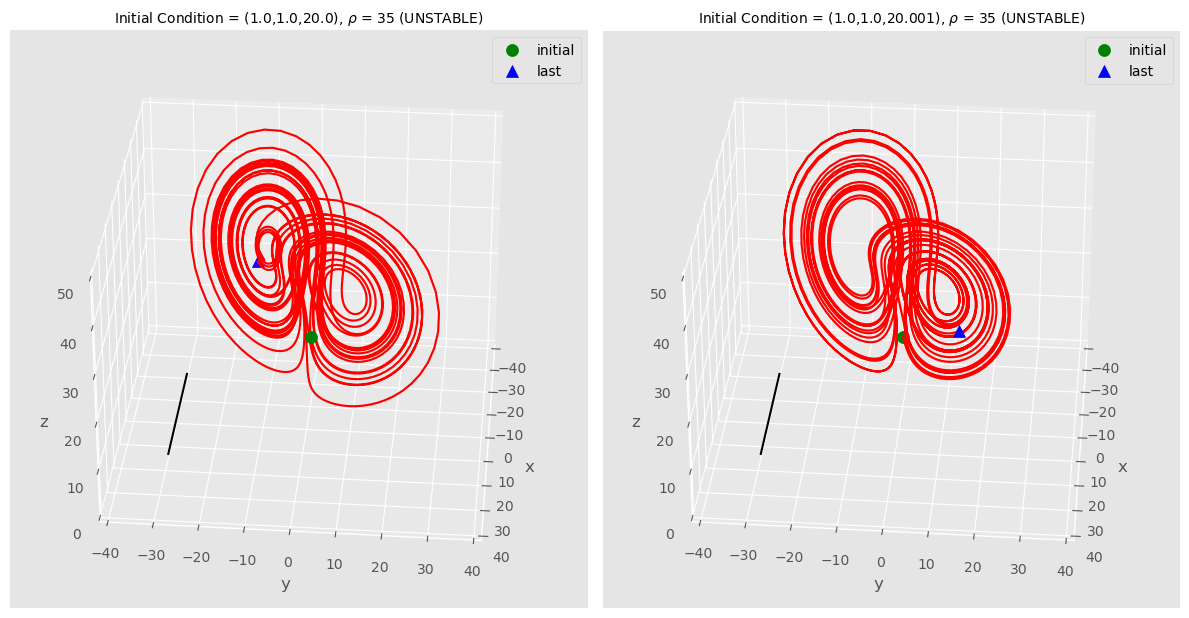

In [70]:
fig = plt.figure(figsize=(12, 12))
x_values = [1,1]
y_values = [1,1]
z_values = [20,20.001]
for i in range(len(x_values)):
    timevars = dict(tstart=0, tend=27, dt=0.01)
    uservars = dict(sigma=10, beta=2.6666, rho=35)
    initvars = dict(x=x_values[i], y=y_values[i], z=z_values[i])
    params = dict(timevars=timevars, uservars=uservars, initvars=initvars)
    
    theSolver = Integ61('lorenz.yaml', **params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals, yvals, zvals = coords[:, 0], coords[:, 1], coords[:, 2]

    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    ax = plot_3d(ax, xvals, yvals, zvals)
    ax.set_title(r'Initial Condition = ({},{},{})'.format(*coords[0,:])  + r', $\rho$ = {} (UNSTABLE)'.format(params['uservars']['rho']), fontsize=10)
    ax.set_xlim((-40, 40))
    ax.set_ylim((-40, 40))
    ax.set_zlim((0, 50))
plt.tight_layout()
plt.show()
    #


Now, we take the difference in their trajectories at each point in time with the same parameters as before, getting plots as a first look of the differences in each one of the components (x,y,z).

First trajectory:

In [71]:
timevars_0 = dict(tstart=0, tend=27, dt=0.01)
uservars_0 = dict(sigma=10, beta=2.6666, rho=35)
initvars_0 = dict(x=1, y=1, z=20)
params_0 = dict(timevars=timevars_0, uservars=uservars_0, initvars=initvars_0)

theSolver = Integ61('lorenz.yaml', **params_0)
timevals_0, coords_0, errorlist_0 = theSolver.timeloop5fixed()
xvals_0, yvals_0, zvals_0 = coords_0[:, 0], coords_0[:, 1], coords_0[:, 2]

Second trajectory:

In [72]:
timevars_1 = dict(tstart=0, tend=27, dt=0.01)
uservars_1 = dict(sigma=10, beta=2.6666, rho=35)
initvars_1 = dict(x=1, y=1, z=20.001)
params_1 = dict(timevars=timevars_1, uservars=uservars_1, initvars=initvars_1)

theSolver = Integ61('lorenz.yaml', **params_1)
timevals_1, coords_1, errorlist_1 = theSolver.timeloop5fixed()
xvals_1, yvals_1, zvals_1 = coords_1[:, 0], coords_1[:, 1], coords_1[:, 2]

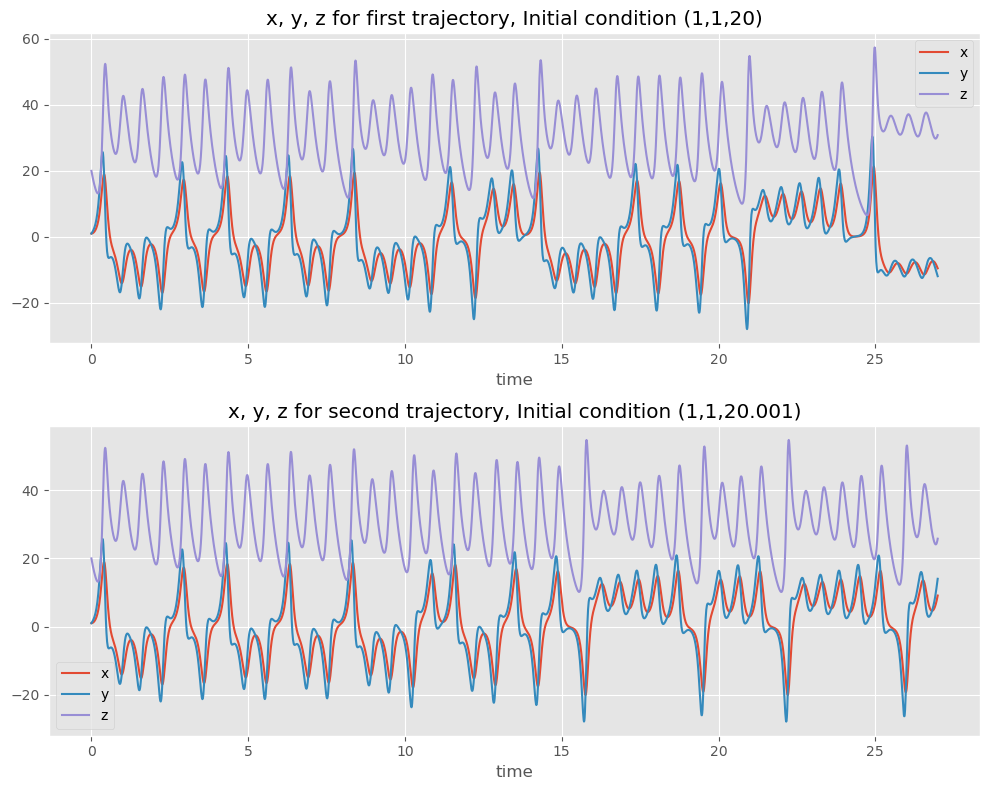

In [73]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(timevals_0,xvals_0,label='x')
ax[0].plot(timevals_0,yvals_0,label='y')
ax[0].plot(timevals_0,zvals_0,label='z')
ax[0].set(title='x, y, z for first trajectory, Initial condition (1,1,20)',xlabel='time')
ax[0].legend()
#
ax[1].plot(timevals_1,xvals_1,label='x')
ax[1].plot(timevals_1,yvals_1,label='y')
ax[1].plot(timevals_1,zvals_1,label='z')
ax[1].set(title='x, y, z for second trajectory, Initial condition (1,1,20.001)',xlabel='time')
ax[1].legend()
#
plt.tight_layout()

Now,the distance between two points in three dimensions can be calculated as follows:

$$d(x,y,z) = \sqrt{(x_1 - x_0)^{2} + (y_1 - y_0)^{2} + (z_1 - z_0)^{2}}$$

In [74]:
diff_x = xvals_1 - xvals_0
diff_y = yvals_1 - yvals_0
diff_z = zvals_1 - zvals_0
#
dist_3d = np.sqrt((diff_x**2) + (diff_y**2) + (diff_z**2))

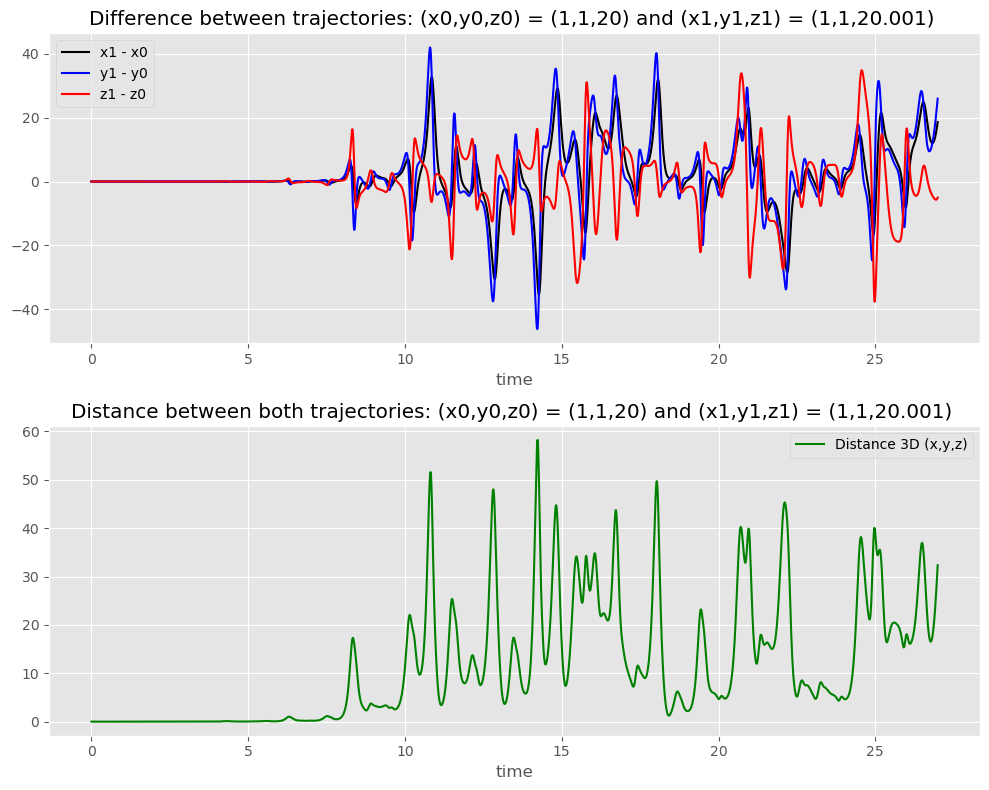

In [75]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax[0].plot(timevals_0,diff_x,'k',label='x1 - x0')
ax[0].plot(timevals_0,diff_y,'b',label='y1 - y0')
ax[0].plot(timevals_0,diff_z,'r',label='z1 - z0')
ax[0].set(title='Difference between trajectories: (x0,y0,z0) = (1,1,20) and (x1,y1,z1) = (1,1,20.001) ',xlabel='time')
ax[0].legend()
#
ax[1].plot(timevals_1,dist_3d,'g',label='Distance 3D (x,y,z)')
ax[1].set(title='Distance between both trajectories: (x0,y0,z0) = (1,1,20) and (x1,y1,z1) = (1,1,20.001) ',xlabel='time')
ax[1].legend()
#
plt.tight_layout()

By looking at the differences between both trajectories, we can see that even if they have a small variation in one of the components of their initial conditions, the behaviour can be really different with time due to the instability of the system, highlighting the dependency of the solution on the given initial conditions.

At first, we see that for the first 5-7 timesteps, the distance between trajectories is almost zero (or even zero). But, after those times, both trajectories start to describe different and irregular behaviours in the three different components (x,y,z), leading to a cahotic and random pattern without obvious similarities between the two systems. 